In [1]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
#  First train_essay_7_prompts.csv is taken from kaggle
#  DF2 file contains the essays generated by chatgpt
# combining and storing the data in new dataset

import pandas as pd
df1 = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/train_essays_7_prompts.csv')
df2 = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/DF2.csv', encoding='latin1')
df1.columns = map(str.lower, df1.columns)
df2.columns = map(str.lower, df2.columns)
new_df = pd.concat([df1, df2], axis=1)
new_df.to_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv', index=False)


In [3]:
# checking whether the files are merged or not and printing the first few rows of new data set

import pandas as pd
new_df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
print(new_df.head())

                                                text  label  \
0  Cars. Cars have been around since they became ...      0   
1  Transportation is a large necessity in most co...      0   
2  "America's love affair with it's vehicles seem...      0   
3  How often do you ride in a car? Do you drive a...      0   
4  Cars are a wonderful thing. They are perhaps o...      0   

                                              text.1  label.1  
0  Technology has transformed education, making l...      1.0  
1  Space exploration has unraveled the mysteries ...      1.0  
2  Environmental conservation is vital for our pl...      1.0  
3  Positive thinking shapes our reality. Cultivat...      1.0  
4  Artificial Intelligence (AI) revolutionizes in...      1.0  


<AxesSubplot:>

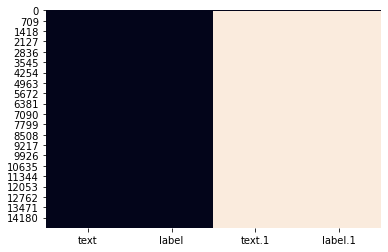

In [4]:
#  null values representation

import seaborn as sns
df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
sns.heatmap(df.isnull(),cbar=False)

In [5]:
#SPLITTING THE DATASET INTO "train, development"

from sklearn.model_selection import train_test_split
import pandas as pd
merged_df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
X = merged_df.drop('label', axis=1)
y = merged_df['label']  
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, y_train.shape)
print("Development:", X_dev.shape, y_dev.shape)


Train: (11901, 3) (11901,)
Development: (2976, 3) (2976,)


In [6]:
#CHECKING WEATHER DATA IS DIVIDED INTO "train,development"


print("Train set shape:", X_train.shape, y_train.shape)
print("Development set shape:", X_dev.shape, y_dev.shape)
print("\nFirst few rows of the train set:")
print(X_train.head())
print(y_train.head())
print("\nFirst few rows of the development set:")
print(X_dev.head())
print(y_dev.head())


Train set shape: (11901, 3) (11901,)
Development set shape: (2976, 3) (2976,)

First few rows of the train set:
                                                    text text.1  label.1
10579  The face could not be an alien act because of ...    NaN      NaN
346    There are many advantages of limiting car usag...    NaN      NaN
14616  Introduction:\nHey there, I know you're really...    NaN      NaN
9978   The face is just a natural landform because of...    NaN      NaN
9669   In 1976 something very strange was found by th...    NaN      NaN
10579    0
346      0
14616    1
9978     0
9669     0
Name: label, dtype: int64

First few rows of the development set:
                                                    text text.1  label.1
12926  Have you ever had a tough decision to make, or...    NaN      NaN
3608   To limit car usage, can bring some positive im...    NaN      NaN
6109   The author supports the idea that studying Ven...    NaN      NaN
10029  Mars is a planet in our solar 

In [7]:
#BUILD A VOCABULARY AS LIST

import pandas as pd
from collections import Counter
df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
min_occurrence = 5
filtered_words = [word for word, count in word_counts.items() if count >= min_occurrence]
vocabulary = filtered_words
reverse_index = {word: idx for idx, word in enumerate(vocabulary)}
print("Vocabulary:", vocabulary)
print("Reverse Index:", reverse_index)

Vocabulary: ['Cars.', 'Cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the', 'when', 'Henry', 'Ford', 'created', 'and', 'built', 'first', 'played', 'a', 'major', 'role', 'our', 'every', 'day', 'lives', 'then.', 'But', 'now,', 'people', 'are', 'starting', 'to', 'question', 'if', 'limiting', 'car', 'usage', 'would', 'be', 'good', 'thing.', 'To', 'me,', 'use', 'of', 'cars', 'might', 'thing', 'do.', 'In', 'like', 'matter', 'this,', 'article,', '"In', 'German', 'Suburb,', 'Life', 'Goes', 'On', 'Without', 'Cars,"', 'by', 'Elizabeth', 'Rosenthal', 'states,', 'how', 'automobiles', 'linchpin', 'suburbs,', 'where', 'middle', 'class', 'families', 'from', 'either', 'Shanghai', 'or', 'Chicago', 'tend', 'make', 'their', 'homes.', 'Experts', 'say', 'this', 'is', 'huge', 'impediment', 'current', 'efforts', 'reduce', 'greenhouse', 'gas', 'emissions', 'tailpipe.', 'Passenger', 'responsible', 'for', '12', 'percent', 'Europe...and', 'up', '50', 'some', 'carintensive', 'areas',

In [8]:
#CALCULATE THE PROBABILITY


import pandas as pd
df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
df['text'] = df['text'].str.split()
num_all_documents = len(df)
num_documents_containing_the = df['text'].apply(lambda x: 'the' in x).sum()
probability_the = num_documents_containing_the / num_all_documents
print(f"Probability of the occurrence of 'the': {probability_the:.4f}")
df_llm = df[df['label'] == 1]
num_llm_documents = len(df_llm)
if num_llm_documents > 0:
    num_llm_documents_containing_the = df_llm['text'].apply(lambda x: 'the' in x).sum()
    probability_the_given_llm = num_llm_documents_containing_the / num_llm_documents
    print(f"Conditional probability of 'the' given LLM: {probability_the_given_llm:.4f}")
else:
    print("No LLM documents in the dataset.")


Probability of the occurrence of 'the': 0.9976
Conditional probability of 'the' given LLM: 0.9940


In [9]:
#CALCULATE ACCURACY USING DEV DATASET

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')
X = df['text']
y = df['label']
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
predictions_dev = model.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, predictions_dev)
print(f"Accuracy on development: {accuracy_dev:.4f}")


NameError: name 'accuracy_score' is not defined

In [ ]:
#Derive Top 10 words that predicts each class.   So to identify the words are predicted by humans mostly


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline

df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')

df['text'] = df['text'].str.split()

# Split the dataset into features (X) and labels (y)
X = df['text'].apply(lambda x: ' '.join(x))  # Convert lists of words back to strings
y = df['label']

# Split the data into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer, TfidfTransformer, and Multinomial Naive Bayes
model = make_pipeline(
    CountVectorizer(),
    TfidfTransformer(),
    MultinomialNB(alpha=1.0) 
)
model.fit(X_train, y_train)
predictions_dev = model.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, predictions_dev)
print(f"Accuracy on development set: {accuracy_dev:.4f}")
feature_names = model.named_steps['countvectorizer'].get_feature_names()
feature_probs_class_0 = model.named_steps['multinomialnb'].feature_log_prob_[0]
feature_probs_class_1 = model.named_steps['multinomialnb'].feature_log_prob_[1]
features_and_probs_class_0 = list(zip(feature_names, feature_probs_class_0))
features_and_probs_class_1 = list(zip(feature_names, feature_probs_class_1))
top_10_features_class_0 = sorted(features_and_probs_class_0, key=lambda x: x[1], reverse=True)[:10]
top_10_features_class_1 = sorted(features_and_probs_class_1, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 features for Class 0 (Human):")
print(top_10_features_class_0)

print("\nTop 10 features for Class 1 (LLM):")
print(top_10_features_class_1)


In [10]:
#COMPARE THE EFFECT OF SMOOTHING


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')


df['text'] = df['text'].str.split()


X = df['text'].apply(lambda x: ' '.join(x))
y = df['label']


X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)


alpha_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Train models with different alpha values and evaluate accuracy on the development set
for alpha in alpha_values:
    model = MultinomialNB(alpha=alpha)
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    model.fit(X_train_vectorized, y_train)

   
    X_dev_vectorized = vectorizer.transform(X_dev)

   
    predictions_dev = model.predict(X_dev_vectorized)

    # Accuracy
    accuracy_dev = accuracy_score(y_dev, predictions_dev)
    print(f"Accuracy on development set with alpha={alpha}: {accuracy_dev:.4f}")


Accuracy on development set with alpha=0.1: 0.9768
Accuracy on development set with alpha=0.5: 0.9755
Accuracy on development set with alpha=1.0: 0.9772
Accuracy on development set with alpha=1.5: 0.9775
Accuracy on development set with alpha=2.0: 0.9785


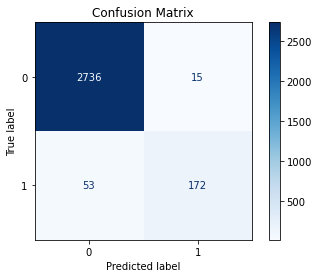

In [11]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


df = pd.read_csv('C:/Users/DEVINEEDI SAI SOUMYA/Downloads/NEW-DF.csv')


df['text'] = df['text'].str.split()


X = df['text'].apply(lambda x: ' '.join(x))
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Naive Bayes model
model = MultinomialNB()
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
model.fit(X_train_vectorized, y_train)

X_test_vectorized = vectorizer.transform(X_test)

y_pred = model.predict(X_test_vectorized)

conf_matrix = confusion_matrix(y_test, y_pred)

# plotting confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
